In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import pickle

from tqdm import tqdm
import os

In [2]:
f = open("./Sonnets.txt", "r")

In [3]:
with open('./Sonnets.txt') as f:
    content = f.readlines()

content = [x.strip() for x in content] 

In [4]:
texts = []
z = []
for i in content:
    if i.isnumeric():
        texts.append(z)
        z = []
        continue
    else:
        print(z)
        z.append(i)

[]
['\ufeffTHE SONNETS']
[]
['']
['', 'From fairest creatures we desire increase,']
['', 'From fairest creatures we desire increase,', 'That thereby beauty’s rose might never die,']
['', 'From fairest creatures we desire increase,', 'That thereby beauty’s rose might never die,', 'But as the riper should by time decease,']
['', 'From fairest creatures we desire increase,', 'That thereby beauty’s rose might never die,', 'But as the riper should by time decease,', 'His tender heir might bear his memory:']
['', 'From fairest creatures we desire increase,', 'That thereby beauty’s rose might never die,', 'But as the riper should by time decease,', 'His tender heir might bear his memory:', 'But thou contracted to thine own bright eyes,']
['', 'From fairest creatures we desire increase,', 'That thereby beauty’s rose might never die,', 'But as the riper should by time decease,', 'His tender heir might bear his memory:', 'But thou contracted to thine own bright eyes,', 'Feed’st thy light’s flame

['', 'Poor soul the centre of my sinful earth,', 'My sinful earth these rebel powers array,', 'Why dost thou pine within and suffer dearth', 'Painting thy outward walls so costly gay?', 'Why so large cost having so short a lease,']
['', 'Poor soul the centre of my sinful earth,', 'My sinful earth these rebel powers array,', 'Why dost thou pine within and suffer dearth', 'Painting thy outward walls so costly gay?', 'Why so large cost having so short a lease,', 'Dost thou upon thy fading mansion spend?']
['', 'Poor soul the centre of my sinful earth,', 'My sinful earth these rebel powers array,', 'Why dost thou pine within and suffer dearth', 'Painting thy outward walls so costly gay?', 'Why so large cost having so short a lease,', 'Dost thou upon thy fading mansion spend?', 'Shall worms inheritors of this excess']
['', 'Poor soul the centre of my sinful earth,', 'My sinful earth these rebel powers array,', 'Why dost thou pine within and suffer dearth', 'Painting thy outward walls so cos

In [5]:
t = []
for i in texts:
    x = ' '.join(i)
    print(x)
    print('------')
    t.append(x)

﻿THE SONNETS 
------
 From fairest creatures we desire increase, That thereby beauty’s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feed’st thy light’s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the world’s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, mak’st waste in niggarding: Pity the world, or else this glutton be, To eat the world’s due, by the grave and thee.  
------
 When forty winters shall besiege thy brow, And dig deep trenches in thy beauty’s field, Thy youth’s proud livery so gazed on now, Will be a tattered weed of small worth held: Then being asked, where all thy beauty lies, Where all the treasure of thy lusty days; To say, within thine own deep sunken eyes, Were an all-eating shame, and thriftless praise. Ho

In [6]:
data = pd.DataFrame(t[1:], columns=['sonnet'])

In [7]:
data.to_csv('sonnets_tabular.csv')

In [8]:
data = pd.read_csv('./sonnets_tabular.csv')

In [9]:
data.head()

,Unnamed: 0,sonnet
0,0,"From fairest creatures we desire increase, Th..."
1,1,"When forty winters shall besiege thy brow, An..."
2,2,Look in thy glass and tell the face thou view...
3,3,"Unthrifty loveliness why dost thou spend, Upo..."
4,4,Those hours that with gentle work did frame T...


In [10]:
# printing some random sonnets
sent_0 = data['sonnet'].values[0]
print(sent_0)
print("="*50)

sent_10 = data['sonnet'].values[10]
print(sent_10)
print("="*50)

sent_15 = data['sonnet'].values[15]
print(sent_15)
print("="*50)

sent_49 = data['sonnet'].values[49]
print(sent_49)
print("="*50)

 From fairest creatures we desire increase, That thereby beauty’s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feed’st thy light’s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the world’s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, mak’st waste in niggarding: Pity the world, or else this glutton be, To eat the world’s due, by the grave and thee.  
 As fast as thou shalt wane so fast thou grow’st, In one of thine, from that which thou departest, And that fresh blood which youngly thou bestow’st, Thou mayst call thine, when thou from youth convertest, Herein lives wisdom, beauty, and increase, Without this folly, age, and cold decay, If all were minded so, the times should cease, And threescore year would make the world away: L

In [11]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_10 = re.sub(r"http\S+", "", sent_10)
sent_15 = re.sub(r"http\S+", "", sent_15)
sent_49 = re.sub(r"http\S+", "", sent_49)

print(sent_0)

 From fairest creatures we desire increase, That thereby beauty’s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feed’st thy light’s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the world’s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, mak’st waste in niggarding: Pity the world, or else this glutton be, To eat the world’s due, by the grave and thee.  


In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent_15 = decontracted(sent_15)
print(sent_15)
print("="*50)

 But wherefore do not you a mightier way Make war upon this bloody tyrant Time? And fortify your self in your decay With means more blessed than my barren rhyme? Now stand you on the top of happy hours, And many maiden gardens yet unset, With virtuous wish would bear you living flowers, Much liker than your painted counterfeit: So should the lines of life that life repair Which this (Time’s pencil) or my pupil pen Neither in inward worth nor outward fair Can make you live your self in eyes of men. To give away your self, keeps your self still, And you must live drawn by your own sweet skill.  


In [14]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

From fairest creatures we desire increase, That thereby beauty’s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feed’st thy light’s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the world’s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, mak’st waste in niggarding: Pity the world, or else this glutton be, To eat the world’s due, by the grave and thee.


In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_15 = re.sub('[^A-Za-z0-9]+', ' ', sent_15)
print(sent_15)

 But wherefore do not you a mightier way Make war upon this bloody tyrant Time And fortify your self in your decay With means more blessed than my barren rhyme Now stand you on the top of happy hours And many maiden gardens yet unset With virtuous wish would bear you living flowers Much liker than your painted counterfeit So should the lines of life that life repair Which this Time s pencil or my pupil pen Neither in inward worth nor outward fair Can make you live your self in eyes of men To give away your self keeps your self still And you must live drawn by your own sweet skill 


In [16]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_sonnets = []
# tqdm is for printing the status bar
for sentance in tqdm(data['sonnet'].values):
    sentance = re.sub(r"http\S+", "", sentance)
     #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_sonnets.append(sentance.strip())

100%|██████████| 153/153 [00:00<00:00, 5488.24it/s]


In [18]:
preprocessed_sonnets

['fairest creatures desire increase thereby beauty rose might never die riper time decease tender heir might bear memory thou contracted thine bright eyes feed st thy light flame self substantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art world fresh ornament herald gaudy spring within thine bud buriest thy content tender churl mak st waste niggarding pity world else glutton eat world due grave thee',
 'forty winters shall besiege thy brow dig deep trenches thy beauty field thy youth proud livery gazed tattered weed small worth held asked thy beauty lies treasure thy lusty days say within thine deep sunken eyes eating shame thriftless praise much praise deserv thy beauty use thou couldst answer fair child mine shall sum count make old excuse proving beauty succession thine new made thou art old see thy blood warm thou feel st cold',
 'look thy glass tell face thou viewest time face form another whose fresh repair thou not renewest thou dost beguile

## Most important word of each sonnet

In [19]:
tf_idf_vect = TfidfVectorizer(min_df=5)
tf_idf_vect.fit(preprocessed_sonnets)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_sonnets)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including unigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['absence', 'age', 'ah', 'alone', 'although', 'another', 'antique', 'argument', 'art', 'away']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (153, 371)
the number of unique words including unigrams  371


In [20]:
features = tf_idf_vect.get_feature_names()

In [21]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [22]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


In [23]:
top_feats_in_doc(final_tf_idf,features, 11 , top_n = 1)

,feature,tfidf
0,see,0.404644


## Most frequent word of each sonnet.

In [34]:
count_vector = CountVectorizer(preprocessed_sonnets)
count_vector.fit(preprocessed_sonnets)
count_vector.get_feature_names()

['abhor',
 'abide',
 'able',
 'absence',
 'absent',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abysm',
 'accents',
 'acceptable',
 'acceptance',
 'accessary',
 'accident',
 'accidents',
 'account',
 'accumulate',
 'accuse',
 'accusing',
 'achieve',
 'acknowledge',
 'acquaintance',
 'acquainted',
 'act',
 'action',
 'active',
 'actor',
 'add',
 'added',
 'adder',
 'addeth',
 'adding',
 'addition',
 'adieu',
 'adjunct',
 'admire',
 'admired',
 'admiring',
 'admit',
 'admitted',
 'adonis',
 'adore',
 'adulterate',
 'advance',
 'advantage',
 'adverse',
 'advised',
 'advocate',
 'afar',
 'affable',
 'affairs',
 'affections',
 'afford',
 'affords',
 'afloat',
 'afresh',
 'afterwards',
 'age',
 'ages',
 'aggravate',
 'ah',
 'aid',
 'air',
 'alack',
 'alas',
 'alchemy',
 'alien',
 'alike',
 'alive',
 'allayed',
 'allege',
 'allow',
 'almost',
 'aloft',
 'alone',
 'already',
 'alt',
 'alter',
 'alteration',
 'altered',
 'alters',
 'although',
 'always',
 'amazeth',
 'ambush',


In [25]:
doc_array = count_vector.transform(preprocessed_sonnets).toarray()
doc_array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
frequency_matrix = pd.DataFrame(doc_array,index=preprocessed_sonnets,columns=count_vector.get_feature_names())
frequency_matrix.head(2)

,abhor,abide,able,absence,absent,abundance,abundant,abuse,abused,abuses,...,yellow,yellowed,yet,yield,yore,young,youngly,youth,youthful,zealous
fairest creatures desire increase thereby beauty rose might never die riper time decease tender heir might bear memory thou contracted thine bright eyes feed st thy light flame self substantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art world fresh ornament herald gaudy spring within thine bud buriest thy content tender churl mak st waste niggarding pity world else glutton eat world due grave thee,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
forty winters shall besiege thy brow dig deep trenches thy beauty field thy youth proud livery gazed tattered weed small worth held asked thy beauty lies treasure thy lusty days say within thine deep sunken eyes eating shame thriftless praise much praise deserv thy beauty use thou couldst answer fair child mine shall sum count make old excuse proving beauty succession thine new made thou art old see thy blood warm thou feel st cold,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
frequency_matrix.shape

(153, 2947)

In [28]:
frequency_matrix.idmax(axis=1)

AttributeError: 'DataFrame' object has no attribute 'idmax'

## Related sonnets

In [35]:
# Generating bag of words features.
count_vect = CountVectorizer()
bow = count_vect.fit_transform(preprocessed_sonnets)
bow.shape

(153, 2947)

In [36]:
# Importing k-Means class from sklearn
from sklearn.cluster import KMeans

In [37]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

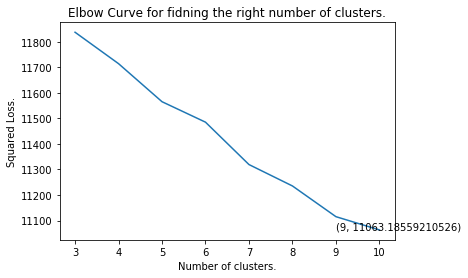

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  11063.18559210526


In [39]:
# Choosing the best cluster using Elbow Method.
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster, n_jobs = -1).fit(bow) # Training Clustering.
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [42]:
# Training the best model --
model = KMeans(n_clusters = optimal_clusters, n_jobs = -1)
model.fit(bow)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_Batch_Float64PlusPlusCSR'.
  Possible C/C++ prototypes are:
    daal::algorithms::kmeans::init::interface1::Batch< double,daal::algorithms::kmeans::init::plusPlusCSR >::Batch(size_t)
    daal::algorithms::kmeans::init::interface1::Batch< double,daal::algorithms::kmeans::init::plusPlusCSR >::Batch(daal::algorithms::kmeans::init::interface1::Batch< double,daal::algorithms::kmeans::init::plusPlusCSR > const &)


In [ ]:
# Giving Labels/assigning a cluster to each point/text 
df = data
df['Label'] = model.labels_
df.head(2)

In [ ]:
# How many points belong to each cluster ->
df.groupby(['Label'])['sonnet'].count()

In [ ]:
plt.bar([x for x in range(optimal_clusters)], df.groupby(['Label'])['sonnetb'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
# Reading a sonet which belong to each group.
for i in range(optimal_clusters):
    print("A sonnet of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Label']).groups[i][0]]['sonnet'])
    print('\n')
    print("_" * 70)